In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json
import ipywidgets as widgets
# Import API key
from api_keys import g_key
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [72]:
csvpath1 = os.path.join('.', 'input_data', 'beers_global.csv')
csvpath2 = os.path.join('.', 'input_data', 'breweries_global.csv')

df_beer = pd.read_csv(csvpath1)
df_brew = pd.read_csv(csvpath2)

print(df_beer.head())
print(df_brew.head())

       id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  214879                        Scottish Right       44306    IN      US   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
4  246438                       Peaches-N-Cream       44617    PA      US   

                     style availability   abv                   notes retired  
0    English Oatmeal Stout     Rotating   7.3  No notes at this time.       f  
1   Russian Imperial Stout     Rotating  10.4  No notes at this time.       f  
2             Scottish Ale   Year-round   4.0  No notes at this time.       t  
3  American Imperial Stout       Winter   8.7    Every time this year       f  
4       American Cream Ale     Rotating   5.1  No notes at this time.       f  
      id                                  name           

In [73]:
# Replace NaN values with 0
df_beer['abv']=df_beer['abv'].fillna(value=0)

# Make ABV a percentage for readability in the plots
df_beer['abv'] = df_beer['abv']*100

df_brew['brewery_id'] = df_brew['id']

df = df_beer.merge(df_brew, on="brewery_id")
print(df.shape)
print(df.info())
df

(358873, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 358873 entries, 0 to 358872
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_x          358873 non-null  int64  
 1   name_x        358873 non-null  object 
 2   brewery_id    358873 non-null  int64  
 3   state_x       298147 non-null  object 
 4   country_x     358719 non-null  object 
 5   style         358872 non-null  object 
 6   availability  358873 non-null  object 
 7   abv           358873 non-null  float64
 8   notes_x       358827 non-null  object 
 9   retired       358873 non-null  object 
 10  id_y          358873 non-null  int64  
 11  name_y        358873 non-null  object 
 12  city          355839 non-null  object 
 13  state_y       298281 non-null  object 
 14  country_y     358853 non-null  object 
 15  notes_y       358340 non-null  object 
 16  types         358873 non-null  object 
dtypes: float64(1), int64(3), object(13)

,id_x,name_x,brewery_id,state_x,country_x,style,availability,abv,notes_x,retired,id_y,name_y,city,state_y,country_y,notes_y,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358868,167034,Vals Paterke,40028,NaN,BE,Belgian Strong Pale Ale,Year-round,830.0,No notes at this time.,f,40028,Brouwerij 't Drankorgel,Mol,NaN,BE,No notes at this time.,"Brewery, Beer-to-go"
358869,214214,Crus - Sacra Birra,44211,NaN,IT,Belgian Dubbel,Rotating,700.0,No notes at this time.,f,44211,Birrificio Artigianale Opera,Pavia,NaN,IT,No notes at this time.,Brewery
358870,200378,Caudillo India Pale Ale,43193,NaN,CL,English India Pale Ale (IPA),Year-round,830.0,No notes at this time.,f,43193,Cerveza Caudillo,Santiago,NaN,CL,No notes at this time.,Brewery
358871,289252,Hellegat Blond,49596,NaN,BE,Belgian Blonde Ale,Year-round,650.0,No notes at this time.,f,49596,Brouwerij De Klem,Niel,NaN,BE,No notes at this time.,"Brewery, Bar"


In [74]:
# Name is repeated name, its beer name and brewery name from the respective CSV files
df = df.rename(index=str, columns={"id_x": "beer_id",
                                    "name_x":"beer_name", "name_y":"brewery_name", 
                                   "notes_x":"beer_notes", "notes_y":"brewery_notes", 
                                   "state_x":"state", "country_x":"country"})

# Drop duplicate columns
df = df.drop(['id_y','state_y','country_y'], axis=1)

print(f"{len(df)}, {len(df.columns)}")
df.head()

358873, 14


,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"


In [75]:
# Observation - dataframe has some places may not be a brewery but bar or eatery only. 
# Filter down by looking for key "Brewery" in types column
df[df['types'].str.contains('Brewery')]
df.head()

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"


In [76]:
country_list = df_brew['country'].unique()
print(country_list)
countries_breweries=df_brew.groupby(['country']).count()
countries_breweries_top=countries_breweries.sort_values(by='name', axis=0, ascending=False)
countries_breweries_top.head()

['BE' 'US' 'GB' 'AU' 'IT' 'CA' 'GR' 'FR' 'AT' 'ES' 'RU' 'SE' 'NL' 'UZ'
 'CO' 'JP' 'PL' 'CZ' 'DE' 'PT' 'DK' 'TW' 'AR' 'NZ' 'CH' 'BR' 'MX' 'VN'
 'FI' 'EE' 'PR' 'UA' 'IM' 'SM' 'CL' 'BZ' 'AL' 'SK' 'IE' 'CN' 'KY' 'PW'
 'NO' 'RO' 'MM' 'SG' 'LT' 'RS' 'BM' 'KH' 'LV' 'HK' 'CY' 'MD' 'IS' 'PH'
 'IN' 'PE' 'UY' 'TR' 'TH' 'IR' 'JM' 'EC' 'ZA' 'KR' 'BG' 'IL' 'LI' 'HU'
 'NG' 'CR' 'VI' 'PS' 'KP' 'MY' 'KG' 'GT' 'CG' 'KE' 'MK' 'FO' 'AE' 'TD'
 'WS' 'JE' 'LA' 'BB' 'TO' 'MN' 'ER' 'DO' 'VU' 'MG' 'GE' 'VE' 'BY' 'SI'
 'CK' 'SV' 'MU' 'ID' 'BH' 'VC' 'SR' 'NE' 'MZ' 'LU' 'RW' 'UG' 'MT' 'HR'
 'GG' 'NC' 'ME' 'PA' 'PF' 'BA' 'TM' 'SN' 'DZ' 'ET' 'AO' 'GH' 'NP' 'MA'
 'BS' 'BT' 'OM' 'KZ' 'CW' 'CU' 'AG' nan 'BF' 'GF' 'AZ' 'HT' 'GL' 'LB' 'DM'
 'HN' 'VG' 'CI' 'GP' 'TC' 'NI' 'BO' 'AM' 'SX' 'GI' 'RE' 'LK' 'GU' 'ST'
 'TZ' 'FJ' 'AW' 'ZW' 'BW' 'LC' 'TN' 'EG' 'SZ' 'TT' 'SB' 'CM' 'LS' 'MO'
 'JO' 'SC' 'MQ' 'AD' 'LY' 'CV' 'TJ' 'ML' 'PG' 'SS' 'PK' 'SY' 'YT' 'GD'
 'AF' 'CF' 'GM' 'MC' 'IQ' 'GQ' 'PY' 'BJ' 'GW' 'BD' 'LR' 'GN' 'TG' 'FM'
 '

,id,name,city,state,notes,types,brewery_id
country,,,,,,,
US,34693,34693,34659,34660,34660,34693,34693
GB,2525,2525,2525,2525,2523,2525,2525
CA,1890,1890,1890,1890,1886,1890,1890
DE,1812,1812,1812,0,1804,1812,1812
BE,756,756,754,0,751,756,756


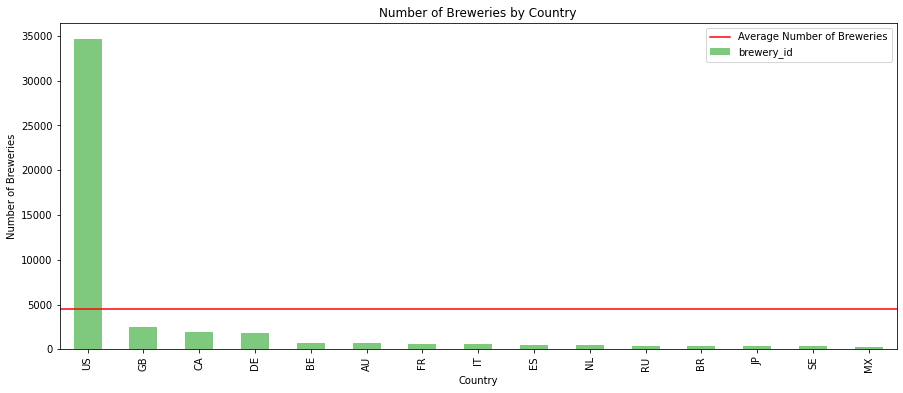

In [77]:
plot = countries_breweries_top['brewery_id'].nlargest(15).plot(kind='bar', title="Number of Breweries by Country", 
                             figsize=(15,6), colormap='Accent')
plot.set_xlabel('Country')
plot.set_ylabel('Number of Breweries')
mean_line = plot.axhline(df.state.value_counts().mean(), color='r', label='Average Number of Breweries')
plt.legend()

In [78]:
def get_data_by_country(df, target_country):
    country_df = df.loc[df['country']== target_country]
    #print(target_country, country_df.head())
    total_breweries = country_df['brewery_name'].unique().size
    print("Total Breweries in " + country_name +": " + str(total_breweries) +"\n")
    return country_df

def get_data_by_topbeerstyles(country_df):
    beer_style=country_df.groupby(['style']).count()
    beer_style_top=beer_style.sort_values(by='beer_id', axis=0, ascending=False)
    return beer_style_top

def plot_top15_beerstyles(beer_style_top, country_name):
    plot3 = beer_style_top['beer_name'].nlargest(15).plot(kind='bar', 
               title=f'Most Brewed Beer Styles in {country_name}', figsize=(15,6),
               colormap='Pastel2',  )
    mean_line3 = plot3.axhline(beer_style_top.count().nlargest(15).mean(), 
                           color='r', label='Average Number of Different Beers')
    plot3.set_ylabel('Number of Different Beers')
    plt.legend()

In [79]:
w1 = widgets.Dropdown(
    options=country_list,
    value='BE',
    description='Type:',
    disabled=False,
)
display(w1)

Dropdown(description='Type:', options=('BE', 'US', 'GB', 'AU', 'IT', 'CA', 'GR', 'FR', 'AT', 'ES', 'RU', 'SE',…

In [80]:
country_name = w1.value
#print(country_name)
country_df = get_data_by_country(df, country_name)
#country_df.info()
beer_style_top = get_data_by_topbeerstyles(country_df)
beer_style_top.head()

Total Breweries in BE: 372



,beer_id,beer_name,brewery_id,state,country,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
style,,,,,,,,,,,,,
Belgian Pale Ale,529,529,529,0,529,529,529,529,529,529,529,525,529
Belgian Strong Pale Ale,508,508,508,0,508,508,508,508,508,508,508,506,508
Belgian Strong Dark Ale,458,458,458,0,458,458,458,458,458,458,458,457,458
Belgian Tripel,452,452,452,0,452,452,452,452,452,452,452,451,452
Belgian Saison,300,300,300,0,300,300,300,300,300,300,296,299,300


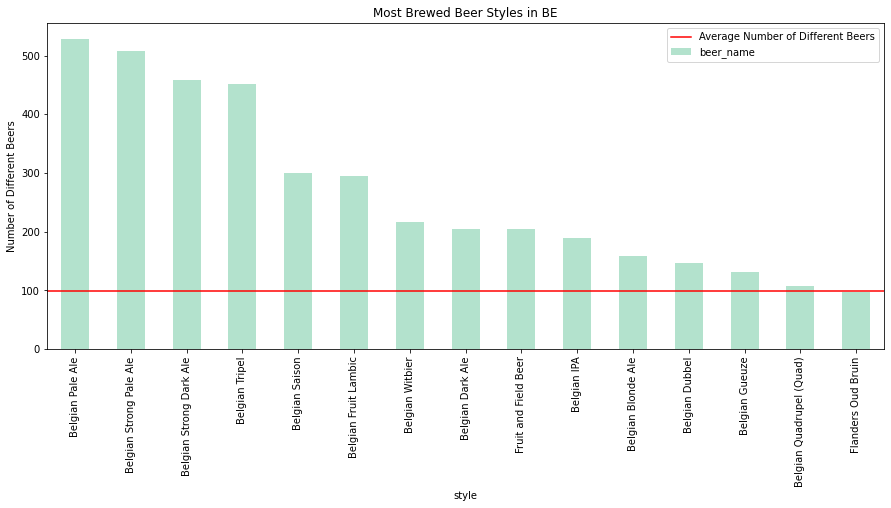

In [81]:
plot_top15_beerstyles(beer_style_top, country_name)

In [82]:
beer_name = input("Search for a beer name: ")

Search for a beer name: ipa


In [83]:
keyword_df = df[df['beer_name'].str.contains(beer_name, na=False, case=False)]
keyword_df

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
10,15934,Rolling Blackout IPA,2199,CA,US,American IPA,Year-round,640.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
13,30870,Train Wreck IPA,2199,CA,US,American IPA,Year-round,720.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
24,98515,Lervig Galaxy IPA,18604,NaN,NO,American IPA,Rotating,650.0,No notes at this time.,f,Lervig Aktiebryggeri,Stavanger,No notes at this time.,Brewery
35,130591,Lervig Brewers Reserve White IPA Wit & IPA Fusion,18604,NaN,NO,American IPA,Year-round,640.0,No notes at this time.,f,Lervig Aktiebryggeri,Stavanger,No notes at this time.,Brewery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358821,230514,Kingston IPA,45554,NaN,AR,American IPA,Year-round,600.0,No notes at this time.,f,Cerveza Kingston,Villa Adelina,No notes at this time.,Brewery
358833,358143,Brouwers IPA,53367,NaN,NL,American IPA,Rotating,600.0,No notes at this time.,f,Albert Heijn (AH),Zaandam,No notes at this time.,Brewery
358841,368518,Tenemu IPA,53513,NaN,MD,American IPA,Rotating,620.0,No notes at this time.,f,Tenemu brewery,Chișinău,No notes at this time.,Brewery
358850,341345,Alveria Imperial IPA,48645,NaN,IT,American Imperial IPA,Rotating,800.0,No notes at this time.,f,Birrificio Alveria,Canicattini Bagni (SR),No notes at this time.,Brewery


In [ ]:
brewery_name = input("Search for a brewery name: ")

In [87]:
keyword_df = df[df['brewery_name'].str.contains(brewery_name, na=False, case=False)]
keyword_df

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
147527,269174,Redd's Peach Ale,105,WI,US,Fruit and Field Beer,Limited (brewed once),500.0,No notes at this time.,t,Miller Brewing Co.,Milwaukee,SABMiller,Brewery
147528,2295,Miller High Life Light,105,WI,US,American Light Lager,Year-round,410.0,No notes at this time.,f,Miller Brewing Co.,Milwaukee,SABMiller,Brewery
147529,310963,Miller Valley LactoseNtolerant,105,WI,US,English Sweet / Milk Stout,Limited (brewed once),710.0,No notes at this time.,f,Miller Brewing Co.,Milwaukee,SABMiller,Brewery
147530,138579,Redd's Hard Iced Tea,105,WI,US,Fruit and Field Beer,Rotating,500.0,No notes at this time.,f,Miller Brewing Co.,Milwaukee,SABMiller,Brewery
147531,3350,Olde English 800,105,WI,US,American Malt Liquor,Year-round,590.0,"There are two variants, a 5.9% ABV and a 7.5% ...",f,Miller Brewing Co.,Milwaukee,SABMiller,Brewery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307382,72931,Lech Pils,3783,NaN,PL,German Pilsner,Year-round,550.0,No notes at this time.,f,Lech Browary Wielkopolski (SABMiller),Poznań,No notes at this time.,Brewery
307383,32532,Lech Premium,3783,NaN,PL,European Pale Lager,Year-round,520.0,No notes at this time.,f,Lech Browary Wielkopolski (SABMiller),Poznań,No notes at this time.,Brewery
307384,123100,Lech Free,3783,NaN,PL,Low Alcohol Beer,Year-round,50.0,No notes at this time.,f,Lech Browary Wielkopolski (SABMiller),Poznań,No notes at this time.,Brewery
355728,88222,Joy Lager Beer,30345,NaN,VN,American Adjunct Lager,Year-round,500.0,No notes at this time.,f,SAB Miller,Mỹ Phước,No notes at this time.,Brewery
